<a href="https://colab.research.google.com/github/jyrj/deeplearning-masterclass-tensorflow/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Importing the libraries

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10

%matplotlib inline
tf.__version__

'2.2.0-rc4'

## Data Prep


### Loading the Cifar10 dataset

In [0]:
# Setting class names in the dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [0]:
# Loading the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


### Image normalization

In [0]:
X_train = X_train / 255.0

In [0]:
X_train.shape

(50000, 32, 32, 3)

In [0]:
X_test = X_test / 255.0

In [0]:
X_test.shape

(10000, 32, 32, 3)

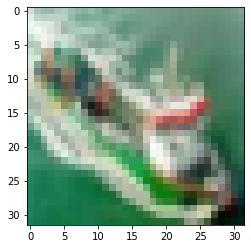

In [0]:
plt.imshow(X_test[15])

##  Building a Convolutional Neural Network

### Defining the model

In [0]:
model = tf.keras.models.Sequential()

### Adding the first convolutional layer

CNN layer hyper-parameters:
- filters: 32
- kernel_size: 3
- padding: same
- activation: relu
- input_shape: (32, 32, 3)


In [0]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]))

### Adding the second convolutional layer and the max-pooling layer

CNN layer hyper-parameters:
- filters: 32
- kernel_size:3
- padding: same
- activation: relu

MaxPool layer hyper-parameters:
- pool_size: 2
- strides: 2
- padding: valid

In [0]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))

In [0]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Adding the third convolutional layer

CNN layer hyper-parameters:

    filters: 64
    kernel_size:3
    padding: same
    activation: relu


In [0]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

###  Adding the fourth convolutional layer and max-pooling layer

CNN layer hyper-parameters:

    filters: 64
    kernel_size:3
    padding: same
    activation: relu

MaxPool layer hyper-parameters:

    pool_size: 2
    strides: 2
    padding: valid


In [0]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

In [0]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Adding the flattening layer

In [0]:
model.add(tf.keras.layers.Flatten())

### Adding the first fully-connected layer

2*Dense layer hyper-parameters:
- units/neurons: 128
- activation: relu
-dropout 20%

In [0]:
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Adding the output layer

Dense layer hyper-parameters:

 - units/neurons: 10 (number of classes)
 - activation: softmax


In [0]:
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

### Compiling the model

#### sparse_categorical_accuracy
sparse_categorical_accuracy checks to see if the maximal true value is equal to the index of the maximal predicted value.

https://stackoverflow.com/questions/44477489/keras-difference-between-categorical-accuracy-and-sparse-categorical-accuracy 

In [0]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])

### Training the model

In [0]:
model.fit(X_train, y_train, epochs=10,batch_size=60)

Epoch 1/10
834/834 [==============================] - 4s 5ms/step - loss: 1.5059 - sparse_categorical_accuracy: 0.4489
Epoch 2/10
834/834 [==============================] - 4s 5ms/step - loss: 1.0283 - sparse_categorical_accuracy: 0.6367
Epoch 3/10
834/834 [==============================] - 4s 5ms/step - loss: 0.8442 - sparse_categorical_accuracy: 0.7043
Epoch 4/10
834/834 [==============================] - 4s 5ms/step - loss: 0.7293 - sparse_categorical_accuracy: 0.7457
Epoch 5/10
834/834 [==============================] - 4s 5ms/step - loss: 0.6340 - sparse_categorical_accuracy: 0.7760
Epoch 6/10
834/834 [==============================] - 4s 5ms/step - loss: 0.5634 - sparse_categorical_accuracy: 0.8022
Epoch 7/10
834/834 [==============================] - 4s 5ms/step - loss: 0.5006 - sparse_categorical_accuracy: 0.8215
Epoch 8/10
834/834 [==============================] - 4s 5ms/step - loss: 0.4383 - sparse_categorical_accuracy: 0.8443
Epoch 9/10
834/834 [============================

### Evaluating the model

In [0]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.8507 - sparse_categorical_accuracy: 0.7422


In [0]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.7422000169754028
